# Glucose Analytics

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

## Explore glucose data from user P12

In [7]:
glucose_df = pd.read_csv('../data/P12/supersapiens/2023-12-21.csv', sep=';')
glucose_df

,glucose,recorded_timestamp
0,85,2023-12-21 14:28:21
1,91,2023-12-21 14:29:21
2,91,2023-12-21 14:30:21
3,96,2023-12-21 14:31:22
4,83,2023-12-21 14:32:01
...,...,...
572,86,2023-12-21 23:55:10
573,85,2023-12-21 23:56:11
574,85,2023-12-21 23:57:10
575,87,2023-12-21 23:58:11


In [8]:
# Convert timestamp
glucose_df['recorded_timestamp'] = pd.to_datetime(glucose_df['recorded_timestamp'])

# Group by hour
glucose_mean_per_hour = glucose_df.groupby(glucose_df['recorded_timestamp'].dt.hour)['glucose'].mean()
print(glucose_mean_per_hour)

recorded_timestamp
14     81.500000
15    100.269841
16     73.396825
17     67.698413
18     72.578947
19     80.830508
20     88.700000
21     82.576271
22     83.066667
23     79.440678
Name: glucose, dtype: float64


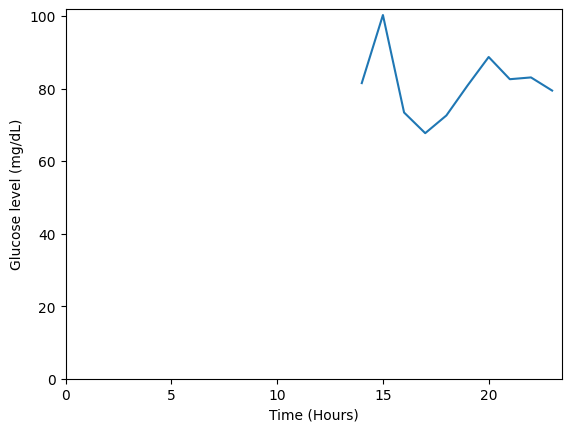

In [10]:
glucose_mean_per_hour.plot(x ='recorded_timestamp', y='glucose', kind='line'),
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.ylabel("Glucose level (mg/dL)")
plt.xlabel("Time (Hours)")

plt.show()

## Glucose analytics for P12 for multiple days

In [12]:
# Load data
glucose_df = pd.read_csv('../data/P12/supersapiens/merged.csv', sep=';')

# Convert timestamp
glucose_df['recorded_timestamp'] = pd.to_datetime(glucose_df['recorded_timestamp'])

glucose_df

,glucose,recorded_timestamp
0,103,2023-12-23 00:00:27
1,104,2023-12-23 00:01:29
2,107,2023-12-23 00:02:29
3,112,2023-12-23 00:03:29
4,112,2023-12-23 00:04:30
...,...,...
18863,98,2023-12-28 23:55:57
18864,98,2023-12-28 23:56:57
18865,98,2023-12-28 23:57:57
18866,98,2023-12-28 23:58:58


In [18]:
# Group by date and calculate mean, median, min, and max
grouped_data = glucose_df.groupby(glucose_df['recorded_timestamp'].dt.date)['glucose'].agg(['mean', 'median', 'min', 'max'])

# Create a DataFrame from the grouped data
result_df = pd.DataFrame(grouped_data)

# Print DataFrame
print(result_df)

                          mean  median  min  max
recorded_timestamp                              
2023-12-21           81.019064    80.0   57  124
2023-12-22           95.214912    95.0   54  171
2023-12-23          100.565649    99.0   54  158
2023-12-24          103.860322   100.0   80  151
2023-12-25          104.198041   103.0   59  146
2023-12-26          108.802076   107.0   83  171
2023-12-27          108.478355   107.5   78  169
2023-12-28          105.195748   104.0   83  155
2023-12-29          105.966184   106.0   63  133
2023-12-30          112.118027   107.0   77  186
2023-12-31          107.381974   107.0   72  156
2024-01-01          106.787106   104.0   83  156
2024-01-02          110.796813   109.0   79  155
2024-01-03          113.972067   114.0   74  151
2024-01-04          110.583884   110.0   95  127


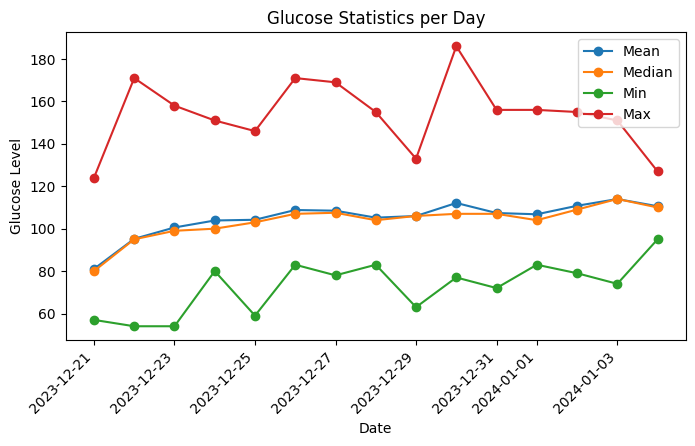

In [42]:
# Make the plot more wide
plt.rcParams["figure.figsize"] = (8, 4)

# Plot mean, median, min, and max values on the same line chart
result_df[['mean', 'median', 'min', 'max']].plot(title='Glucose Statistics per Day', marker='o', linestyle='-')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Glucose Level')
plt.legend(['Mean', 'Median', 'Min', 'Max'])
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


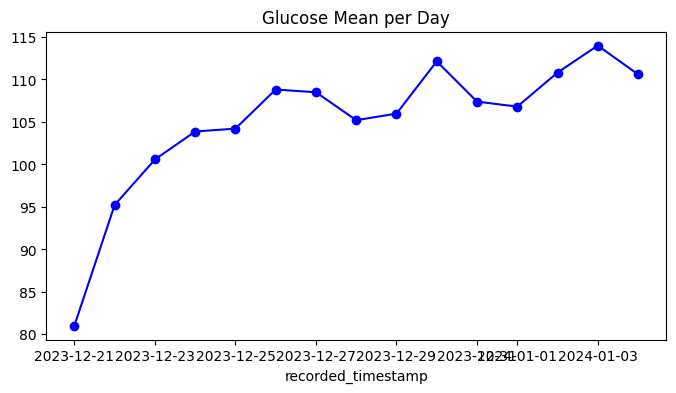

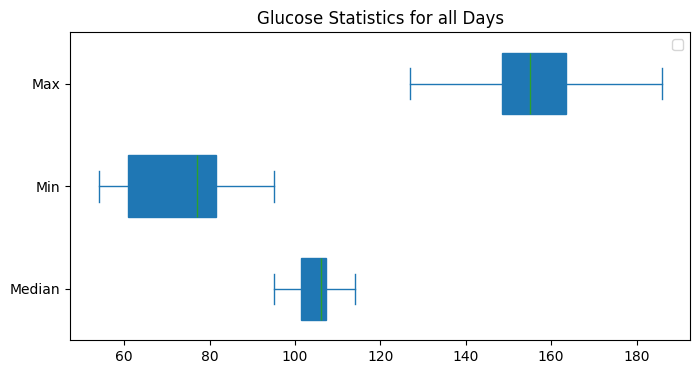

In [44]:
# Plot mean values
result_df['mean'].plot(title='Glucose Mean per Day', marker='o', linestyle='-', color='blue', label='Mean')

# Plot boxplot for median, min, and max
result_df[['median', 'min', 'max']].plot.box(showfliers=False, vert=False, positions=[1, 2, 3], widths=0.6, patch_artist=True)

# Add labels and legend
plt.yticks([1, 2, 3], ['Median', 'Min', 'Max'])
plt.title('Glucose Statistics for all Days')
plt.legend()

# Show the plot
plt.show()